<a href="https://colab.research.google.com/github/AlexAlexeyuk/Alexander.Alexeyuk/blob/master/generation1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
!pip install sdv

In [9]:
import matplotlib.pyplot as plt


In [12]:
df  = pd.read_csv('/content/Proc_data_1.csv')

In [17]:

df.drop(['Hemoglobin','Unnamed: 0', 'Unnamed: 0.1',
         'ID', 'Diagnosis', 
         'COVID-19'], axis=1)

,Max_Platlets,Min_Platlets,Max_Leucocytes,Min_Leucocytes,Max_Creatinine,Min_Cratinine,Gender,initial_CRP,Max_CRP,Treatment,Birthday,Admission,Discharge,Pneumonia,Severity,IHD,COPD,Bronchial_asthma,Obesity,Diabetes,RF,ALT,AST,Initial_Procalcitonine,Max_Procalcitonine
0,269.0,269.0,10.02,10.02,107.0,76.0,female,68.90,68.90,"цефтриаксон, дексаметазон, аскорб. к-та, ац...",15:02:1940,23:12:2020,19:01:2021,1,1,0,0,0,0,0,0.0,381.4,61.6,0.10,0.10
1,282.0,282.0,6.14,6.14,78.0,59.0,female,30.00,36.00,"меропенем, озельтамивир, фраксипарин, ранитид...",23:01:1985,26:12:2018,15:02:2019,0,0,0,0,0,0,0,0.0,56.0,96.0,0.05,0.05
2,440.0,440.0,7.59,7.59,656.0,88.0,female,5.74,61.50,"цефтриаксон, омепразол, гепарин,левофлоксацин...",03:08:1955,07:07:2020,24:07:2020,1,0,0,0,0,0,0,1.0,17.0,25.0,0.20,0.20
3,228.0,228.0,10.65,10.65,59.0,43.0,female,113.50,124.20,"гепарин, аспикард, омепразол, амброксол, дек...",13:12:1949,28:06:2020,21:07:2020,1,0,1,0,0,0,0,0.0,21.0,16.0,0.23,0.23
4,236.0,236.0,13.88,13.88,107.0,95.0,male,36.10,171.60,"ванкомицин, кпс, фуросемид, имепенем, ацетилц...",18:03:1954,21:10:2020,20:11:2020,1,1,1,0,0,0,0,2.0,0.0,0.0,0.07,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,249.0,249.0,7.19,7.19,93.0,93.0,male,27.20,27.20,"левофлоксацин, амброксол, аспикард, омепразол...",20:07:1957,06:01:2021,15:01:2021,1,0,1,0,0,0,0,1.0,53.2,18.7,0.07,0.07
69,327.0,327.0,16.24,16.24,133.0,93.0,male,27.10,27.10,"цефтриаксон, дексаметазон, гепарин, парацетам...",04:11:1979,19:12:2020,06:01:2021,1,1,0,0,0,1,0,2.0,34.6,31.4,0.07,0.07
70,234.0,234.0,9.90,9.90,151.0,114.0,male,170.00,170.00,"имепенем. левофлоксацин, озельтамивир, тигац...",01:01:1957,01:11:2018,03:12:2018,1,1,1,1,0,0,0,2.0,150.0,147.0,0.37,0.37
71,233.0,233.0,3.25,3.25,84.0,84.0,male,6.00,12.00,"цефоперазон/сульбактам/сульбактам, левофлокса...",06:03:1966,09:10:2018,02:11:2018,1,1,0,0,0,0,0,1.0,109.0,77.0,0.14,0.14


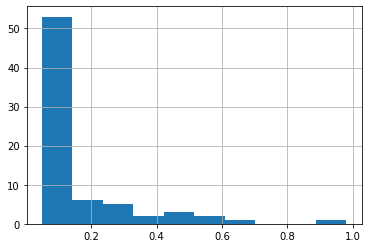

In [ ]:
df['Initial_Procalcitonine'].hist()


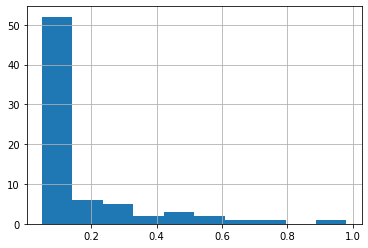

In [ ]:
df['Max_Procalcitonine'].hist()

In [18]:
from sdv.tabular import GaussianCopula
model = GaussianCopula()
model.fit(df)
new_data_1 = model.sample(400)
new_data_1.head()

/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr

,Unnamed: 0,Unnamed: 0.1,ID,Max_Platlets,Min_Platlets,Max_Leucocytes,Min_Leucocytes,Hemoglobin,Max_Creatinine,Min_Cratinine,Gender,initial_CRP,Max_CRP,Treatment,Birthday,Admission,Discharge,Diagnosis,COVID-19,Pneumonia,Severity,IHD,COPD,Bronchial_asthma,Obesity,Diabetes,RF,ALT,AST,Initial_Procalcitonine,Max_Procalcitonine
0,318,318,4524.257356,348.358674,348.332323,8.095622,8.093874,[138. 150.],114.261310,147.722695,male,0.221229,15.485036,"цефтриаксон, фрагмин, фраксипарин, дексаметазо...",19:02:1971,24:12:2020,01:02:2021,в 34 инфекция вызванная covid 19 мазок пцр на ...,1,1,0,1,0,0,0,0,0.715693,83.551113,39.360674,0.054286,0.052739
1,298,298,6503.763890,400.340408,400.329005,17.305976,17.298519,[144. 128. 126. 123. 125. 134. 152. 168. 160.],97.778914,73.240141,male,5.665226,78.352789,цефтриаксон.левофлоксацин.гепарин.фолиевая ки...,16:02:1985,10:07:2020,24:12:2020,в342 инфекция вызванная covid19 кт 100720экспр...,1,1,0,1,0,0,0,0,0.738918,92.477036,20.619833,0.070746,0.072630
2,294,294,2701.889942,407.026441,406.851968,10.114930,10.115359,[133. 134. 129. 125. 135.],103.579878,66.169773,female,125.763861,72.191066,"цефтриаксон, дексаметазон, аскорб. к-та, ац...",15:02:1940,25:12:2020,22:01:2021,в 342 тяжёлая коронавирусная инфекция реконвал...,1,1,1,0,0,0,0,0,1.461929,22.189746,21.345913,0.106993,0.109661
3,299,299,2829.982474,257.691811,257.597682,14.653290,14.650459,[144. 149. 162.],69.984156,45.987432,male,73.234240,137.080146,None,06:07:1970,11:12:2020,23:12:2020,в 34 инфекция вызванная сovid19 пцр от 1112202...,1,1,2,0,0,0,0,0,1.475143,93.048580,47.408772,0.144759,0.214738
4,303,303,6798.565222,242.046519,241.994486,9.836508,9.833937,[143. 140. 140. 119. 58. 101.],58.275253,50.022998,male,7.248751,33.742667,тайгециклин( по 50 мг 2 р\сут с 30.10.20 по 0...,06:08:1973,30:09:2020,09:11:2020,лимфопролиферативное заболевание инфекция вызв...,0,1,0,1,0,0,0,0,1.791642,18.665207,51.058533,0.050234,0.060570


In [19]:
# переводим наши даты в формат пандас
for i in ['Birthday', 'Admission', 'Discharge']:
  df[i] = pd.to_datetime(df[i], format = "%d:%m:%Y")
# длительность госпитализации = выписка - поступление
df["duration"] = (df['Discharge'] - df['Admission']).dt.days

# возраст пациента рассчитаем: день рождения - поступление = дни и целочисленно делим на 356
df["Age"] = ((df['Admission'] - df['Birthday']).dt.days) // 356
data = df.drop(['Birthday', 'Admission', 'Discharge'], axis=1)

In [20]:
from sdv.tabular import GaussianCopula
model_ = GaussianCopula()
model_.fit(data)
new_data_1_ = model.sample(400)
new_data_1_.head()

/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:547: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_continuous_distns.py:4798: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:2407: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)
/usr

,Unnamed: 0,Unnamed: 0.1,ID,Max_Platlets,Min_Platlets,Max_Leucocytes,Min_Leucocytes,Hemoglobin,Max_Creatinine,Min_Cratinine,Gender,initial_CRP,Max_CRP,Treatment,Birthday,Admission,Discharge,Diagnosis,COVID-19,Pneumonia,Severity,IHD,COPD,Bronchial_asthma,Obesity,Diabetes,RF,ALT,AST,Initial_Procalcitonine,Max_Procalcitonine
0,305,305,8519.755799,451.629501,451.646182,11.625356,11.629526,[164. 164. 164.],114.370263,136.409924,male,1.280283,13.917055,"дексаметазон, кпс, аспикард, лозартон аторвас...",22:06:1955,13:11:2020,23:07:2020,инфекция ср ст тяжэт 231220 м пол джи отрвнего...,0,1,0,1,0,0,0,0,0.849875,102.317346,58.432519,0.351636,0.342467
1,213,213,3622.215468,-30.119440,-30.109946,8.045245,8.046350,[133. 134. 129. 125. 135.],107.646465,67.277971,male,190.090552,210.626175,None,15:02:1940,17:12:2020,01:02:2021,в 342 тяжёлая коронавирусная инфекция реконвал...,1,1,1,0,0,0,0,0,1.016863,225.779953,87.575656,0.051798,0.051837
2,313,313,4108.305344,68.853604,68.925117,7.311479,7.305042,[145.],106.341133,62.310109,female,78.447109,132.774568,"цефтриаксон, дексаметазон, гидроксихлорохин,...",10:01:1952,20:12:2020,29:12:2020,в 342 тяжёлая коронавирусная инфекцияэт на ат ...,1,1,1,1,0,0,0,0,0.257570,95.480911,48.525126,0.054781,0.052865
3,273,273,5785.791005,220.689792,220.657121,7.101137,7.101667,[117. 122. 115. 116. 121.],123.214871,101.391750,female,8.878393,46.133046,"цефтриаксон, левофлоксацин, дексаметазон, гепа...",12:07:1981,17:12:2020,31:12:2020,в 34 инфекция вызванная covid 19 пцр положит о...,1,1,0,0,0,0,0,0,1.863413,141.409456,141.105463,0.053384,0.050479
4,302,302,1757.841858,464.747100,464.725307,10.876287,10.872180,[103. 144. 146.],88.820492,65.477755,female,104.328120,159.138097,"левофлоксацин, амброксол, аспикард, омепразол...",20:07:1957,06:01:2021,15:01:2021,b342 среднетяжёлая короновирусная sarscov2 ig ...,1,1,1,1,0,0,0,0,1.596056,138.405256,48.728331,0.051602,0.050981


In [21]:
from sdv.tabular import CTGAN

model2 = CTGAN()
model2.fit(df)

/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/s

In [23]:
new_data_2 = model2.sample(400)

In [22]:
model2_ = CTGAN()
model2_.fit(data)

/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/sklearn/mixture/_base.py:147: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.6/dist-packages/s

In [24]:
new_data_2_ = model2_.sample(400)

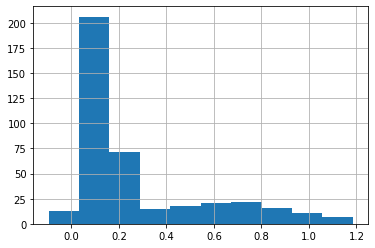

In [25]:
new_data_2_['Max_Procalcitonine'].hist()

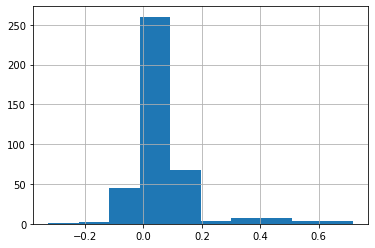

In [26]:
new_data_2['Max_Procalcitonine'].hist()

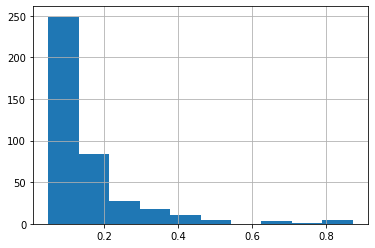

In [27]:
new_data_1_['Max_Procalcitonine'].hist()

In [113]:
# переводим наши даты в формат пандас
for i in ['Birthday', 'Admission', 'Discharge']:
  df[i] = pd.to_datetime(df[i], format = "%d:%m:%Y")
# длительность госпитализации = выписка - поступление
df["duration"] = (df['Discharge'] - df['Admission']).dt.days

# возраст пациента рассчитаем: день рождения - поступление = дни и целочисленно делим на 356
df["Age"] = ((df['Admission'] - df['Birthday']).dt.days) // 356
data = df.drop(['Birthday', 'Admission', 'Discharge'], axis=1)
new_data_1['Age'] =  new_data_1['Age'].map(lambda x: x + 10 if x < 10 else x)

KeyError: ignored

In [194]:
new_data_2.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'ID', 'Max_Platlets', 'Min_Platlets',
       'Max_Leucocytes', 'Min_Leucocytes', 'Hemoglobin', 'Max_Creatinine',
       'Min_Cratinine', 'Gender', 'initial_CRP', 'Max_CRP', 'Treatment',
       'Birthday', 'Admission', 'Discharge', 'Diagnosis', 'COVID-19',
       'Pneumonia', 'Severity', 'IHD', 'COPD', 'Bronchial_asthma', 'Obesity',
       'Diabetes', 'RF', 'ALT', 'AST', 'Initial_Procalcitonine',
       'Max_Procalcitonine', 'duration', 'Age'],
      dtype='object')

In [195]:

new_data_2['Age'] =  new_data_2['Age'].map(lambda x: x + 10 if x < 10 else x)

In [196]:
dataf = new_data_2.copy()

In [197]:
dataf = dataf.drop(['Unnamed: 0', 'Unnamed: 0.1',
         'ID', 'Diagnosis', 
         'COVID-19', "Treatment", 'duration',
          'Birthday', 'Admission', 'Discharge', 'Diagnosis',
          'Pneumonia', 'Hemoglobin'], axis=1)

In [198]:
import tensorflow as tf
from tensorflow import keras

import os
import tempfile

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [199]:
mpl.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [200]:
def ind_ab(x):
  if x > .4:
    return 1
  else:
    return 0

In [201]:
dataf['Ab_ind'] = dataf['Max_Procalcitonine'].apply(ind_ab)

In [202]:
dataf['Ab_ind'].value_counts()

0    386
1     14
Name: Ab_ind, dtype: int64

In [203]:
dataf = dataf.drop(['Unnamed: 0', 'Unnamed: 0.1',
         'ID', 'Diagnosis', 
         'COVID-19', "Treatment"], axis=1)

KeyError: ignored

In [204]:
neg, pos = np.bincount(dataf['Ab_ind'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 400
    Positive: 14 (3.50% of total)



In [205]:
dataf[['Max_Platlets', 'Min_Platlets', 'Max_Leucocytes', 'Min_Leucocytes',
        'Max_Creatinine', 'Min_Cratinine', 'Gender',
       'initial_CRP', 'Max_CRP', 'Pneumonia', 'Severity', 'IHD', 'COPD',
       'Bronchial_asthma', 'Obesity', 'Diabetes', 'RF', 'ALT', 'AST', 'Age',
       'Ab_ind']].describe

KeyError: ignored

In [206]:
cleaned_df = dataf.copy()


In [207]:
cleaned_df['Gender'] = cleaned_df['Gender'].map({'male': 1, 'female': 0})

In [208]:
# Use a utility from sklearn to split and shuffle our dataset.
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Ab_ind'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Ab_ind'))
test_labels = np.array(test_df.pop('Ab_ind'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [209]:
scaler = StandardScaler()
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (256,)
Validation labels shape: (64,)
Test labels shape: (80,)
Training features shape: (256, 21)
Validation features shape: (64, 21)
Test features shape: (80, 21)


In [210]:
cleaned_df.columns

Index(['Max_Platlets', 'Min_Platlets', 'Max_Leucocytes', 'Min_Leucocytes',
       'Max_Creatinine', 'Min_Cratinine', 'Gender', 'initial_CRP', 'Max_CRP',
       'Severity', 'IHD', 'COPD', 'Bronchial_asthma', 'Obesity', 'Diabetes',
       'RF', 'ALT', 'AST', 'Initial_Procalcitonine', 'Max_Procalcitonine',
       'Age', 'Ab_ind'],
      dtype='object')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


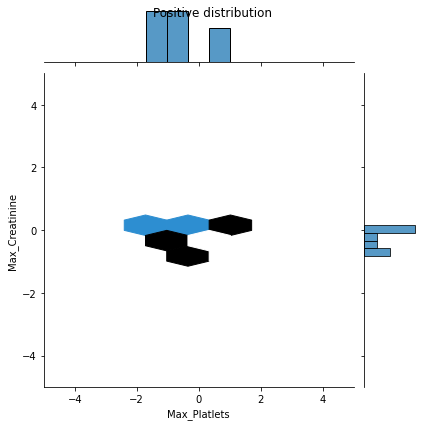

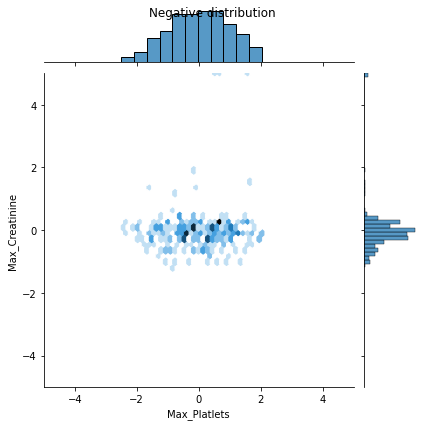

In [211]:
pos_df = pd.DataFrame(train_features[ bool_train_labels], columns=train_df.columns)
neg_df = pd.DataFrame(train_features[~bool_train_labels], columns=train_df.columns)

sns.jointplot(pos_df['Max_Platlets'], pos_df['Max_Creatinine'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
plt.suptitle("Positive distribution")

sns.jointplot(neg_df['Max_Platlets'], neg_df['Max_Creatinine'],
              kind='hex', xlim=(-5,5), ylim=(-5,5))
_ = plt.suptitle("Negative distribution")

In [212]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(lr=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model

In [213]:
EPOCHS = 100
BATCH_SIZE = 2048

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', 
    verbose=1,
    patience=10,
    mode='max',
    restore_best_weights=True)

In [214]:
model = make_model()
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 16)                352       
_________________________________________________________________
dropout_16 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 17        
Total params: 369
Trainable params: 369
Non-trainable params: 0
_________________________________________________________________


In [215]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.3939


In [216]:
initial_bias = np.log([pos/neg])
initial_bias

array([-3.31678004])

In [217]:
model = make_model(output_bias=initial_bias)
model.predict(train_features[:10])

array([[0.0437237 ],
       [0.00706771],
       [0.03253707],
       [0.04418969],
       [0.02240828],
       [0.01663798],
       [0.0358991 ],
       [0.03149593],
       [0.01031893],
       [0.01987976]], dtype=float32)

In [218]:
results = model.evaluate(train_features, train_labels, batch_size=BATCH_SIZE, verbose=0)
print("Loss: {:0.4f}".format(results[0]))

Loss: 0.1605


In [219]:
initial_weights = os.path.join(tempfile.mkdtemp(), 'initial_weights')
model.save_weights(initial_weights)

In [220]:
model = make_model()
model.load_weights(initial_weights)
model.layers[-1].bias.assign([0.0])
zero_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [221]:
model = make_model()
model.load_weights(initial_weights)
careful_bias_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=20,
    validation_data=(val_features, val_labels), 
    verbose=0)

In [222]:
def plot_loss(history, label, n):
  # Use a log scale on y-axis to show the wide range of values.
  plt.semilogy(history.epoch, history.history['loss'],
               color=colors[n], label='Train ' + label)
  plt.semilogy(history.epoch, history.history['val_loss'],
               color=colors[n], label='Val ' + label,
               linestyle="--")
  plt.xlabel('Epoch')
  plt.ylabel('Loss')

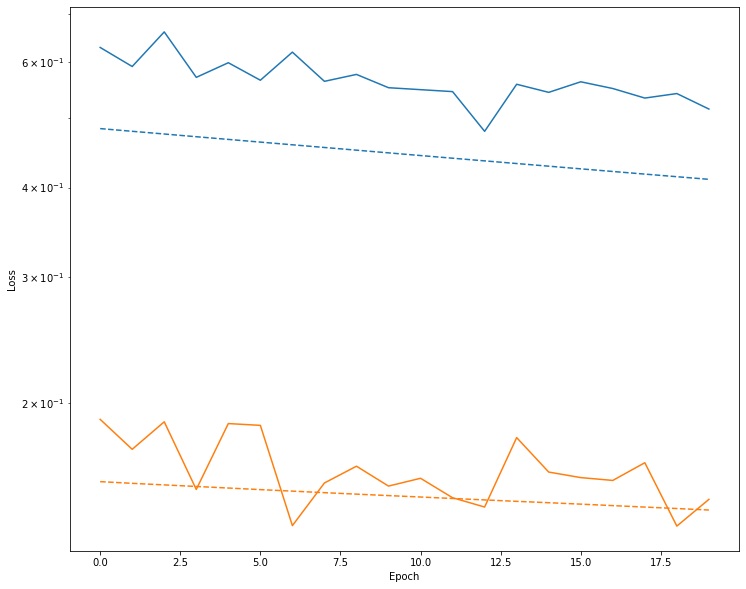

In [223]:
plot_loss(zero_bias_history, "Zero Bias", 0)
plot_loss(careful_bias_history, "Careful Bias", 1)

In [224]:
model = make_model()
model.load_weights(initial_weights)
baseline_history = model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels))

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.1823 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 310.0000 - fn: 10.0000 - accuracy: 0.9688 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.3824 - val_loss: 0.1553 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 62.0000 - val_fn: 2.0000 - val_accuracy: 0.9688 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4637
Epoch 2/100
1/1 [==============================] - 0s 50ms/step - loss: 0.1756 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 248.0000 - fn: 8.0000 - accuracy: 0.9688 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4027 - val_loss: 0.1545 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 62.0000 - val_fn: 2.0000 - val_accuracy: 0.9688 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4718
Epoch 3/100
1/1 [==============================] - 0s 51ms/step - loss: 0.1526 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 248.0000 - fn: 8.0000 - accuracy: 0.9688 - precision: 0.0000e+00

In [225]:
def plot_metrics(history):
  metrics = ['loss', 'auc', 'precision', 'recall']
  for n, metric in enumerate(metrics):
    name = metric.replace("_"," ").capitalize()
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric], color=colors[0], label='Train')
    plt.plot(history.epoch, history.history['val_'+metric],
             color=colors[0], linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    if metric == 'loss':
      plt.ylim([0, plt.ylim()[1]])
    elif metric == 'auc':
      plt.ylim([0.8,1])
    else:
      plt.ylim([0,1])

    plt.legend()

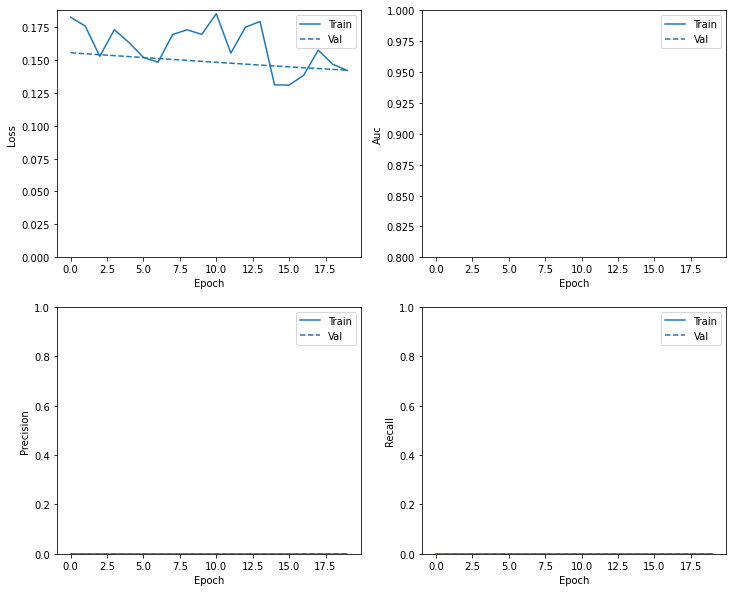

In [226]:
plot_metrics(baseline_history)

In [227]:
train_predictions_baseline = model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_baseline = model.predict(test_features, batch_size=BATCH_SIZE)

In [228]:
def plot_cm(labels, predictions, p=0.5):
  cm = confusion_matrix(labels, predictions > p)
  plt.figure(figsize=(5,5))
  sns.heatmap(cm, annot=True, fmt="d")
  plt.title('Confusion matrix @{:.2f}'.format(p))
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
  print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
  print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
  print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
  print('Total Fraudulent Transactions: ', np.sum(cm[1]))

loss :  0.18481118977069855
tp :  0.0
fp :  0.0
tn :  76.0
fn :  4.0
accuracy :  0.949999988079071
precision :  0.0
recall :  0.0
auc :  0.6973683834075928

Legitimate Transactions Detected (True Negatives):  76
Legitimate Transactions Incorrectly Detected (False Positives):  0
Fraudulent Transactions Missed (False Negatives):  4
Fraudulent Transactions Detected (True Positives):  0
Total Fraudulent Transactions:  4


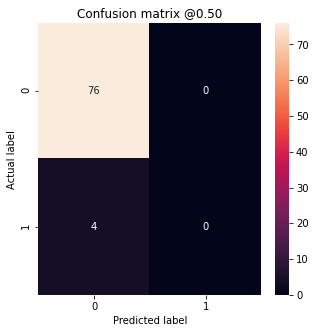

In [229]:
baseline_results = model.evaluate(test_features, test_labels,
                                  batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(model.metrics_names, baseline_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_baseline)

In [230]:
def plot_roc(name, labels, predictions, **kwargs):
  fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)

  plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
  plt.xlabel('False positives [%]')
  plt.ylabel('True positives [%]')
  plt.xlim([-0.5,20])
  plt.ylim([80,100.5])
  plt.grid(True)
  ax = plt.gca()
  ax.set_aspect('equal')

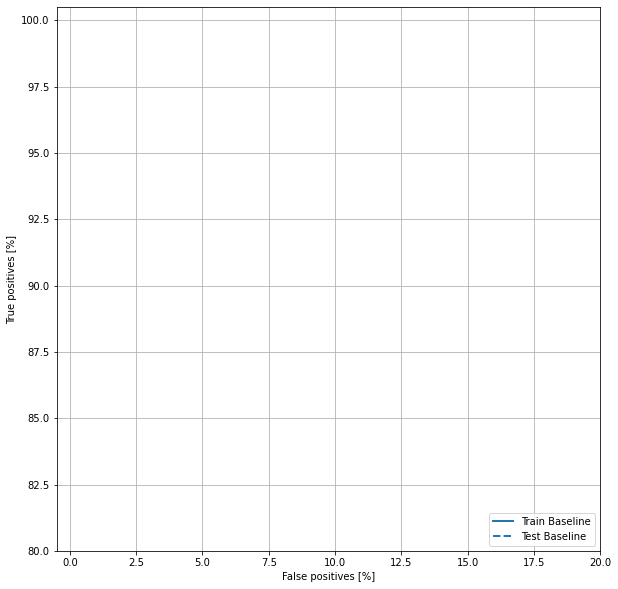

In [231]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')
plt.legend(loc='lower right')

In [232]:
# Scaling by total/2 helps keep the loss to a similar magnitude.
# The sum of the weights of all examples stays the same.
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.52
Weight for class 1: 14.29


In [233]:
weighted_model = make_model()
weighted_model.load_weights(initial_weights)

weighted_history = weighted_model.fit(
    train_features,
    train_labels,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_features, val_labels),
    # The class weights go here
    class_weight=class_weight) 

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 2.0170 - tp: 0.0000e+00 - fp: 1.0000 - tn: 323.0000 - fn: 12.0000 - accuracy: 0.9613 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.4684 - val_loss: 0.1553 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 62.0000 - val_fn: 2.0000 - val_accuracy: 0.9688 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4718
Epoch 2/100
1/1 [==============================] - 0s 59ms/step - loss: 2.0626 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 248.0000 - fn: 8.0000 - accuracy: 0.9688 - precision: 0.0000e+00 - recall: 0.0000e+00 - auc: 0.3810 - val_loss: 0.1545 - val_tp: 0.0000e+00 - val_fp: 0.0000e+00 - val_tn: 62.0000 - val_fn: 2.0000 - val_accuracy: 0.9688 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_auc: 0.4718
Epoch 3/100
1/1 [==============================] - 0s 58ms/step - loss: 1.9141 - tp: 0.0000e+00 - fp: 0.0000e+00 - tn: 248.0000 - fn: 8.0000 - accuracy: 0.9688 - precision: 0.0000e+00 - r

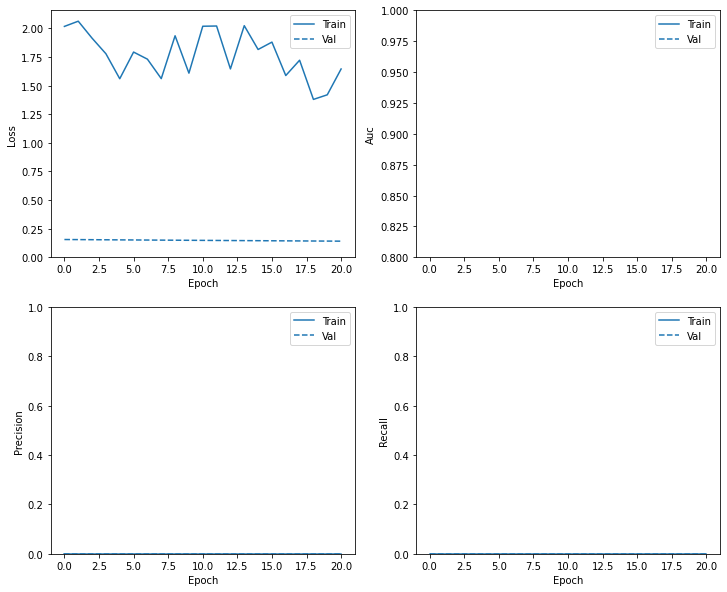

In [234]:
plot_metrics(weighted_history)

In [235]:
train_predictions_weighted = weighted_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_weighted = weighted_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.18052799999713898
tp :  0.0
fp :  0.0
tn :  76.0
fn :  4.0
accuracy :  0.949999988079071
precision :  0.0
recall :  0.0
auc :  0.7105262875556946

Legitimate Transactions Detected (True Negatives):  76
Legitimate Transactions Incorrectly Detected (False Positives):  0
Fraudulent Transactions Missed (False Negatives):  4
Fraudulent Transactions Detected (True Positives):  0
Total Fraudulent Transactions:  4


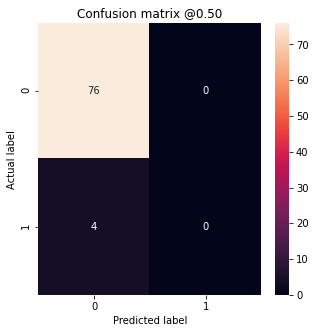

In [236]:
weighted_results = weighted_model.evaluate(test_features, test_labels,
                                           batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(weighted_model.metrics_names, weighted_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_weighted)

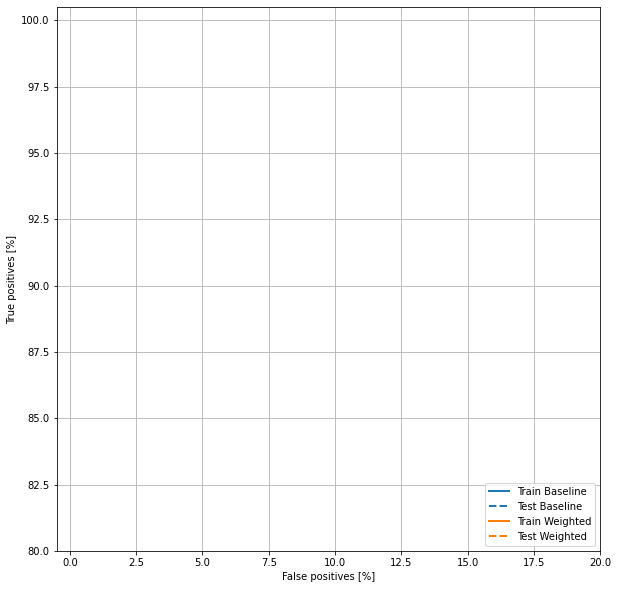

In [237]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')


plt.legend(loc='lower right')

In [238]:
pos_features = train_features[bool_train_labels]
neg_features = train_features[~bool_train_labels]

pos_labels = train_labels[bool_train_labels]
neg_labels = train_labels[~bool_train_labels]

In [239]:
ids = np.arange(len(pos_features))
choices = np.random.choice(ids, len(neg_features))

res_pos_features = pos_features[choices]
res_pos_labels = pos_labels[choices]

res_pos_features.shape

(248, 21)

In [240]:
resampled_features = np.concatenate([res_pos_features, neg_features], axis=0)
resampled_labels = np.concatenate([res_pos_labels, neg_labels], axis=0)

order = np.arange(len(resampled_labels))
np.random.shuffle(order)
resampled_features = resampled_features[order]
resampled_labels = resampled_labels[order]

resampled_features.shape

(496, 21)

In [241]:
BUFFER_SIZE = 100000

def make_ds(features, labels):
  ds = tf.data.Dataset.from_tensor_slices((features, labels))#.cache()
  ds = ds.shuffle(BUFFER_SIZE).repeat()
  return ds

pos_ds = make_ds(pos_features, pos_labels)
neg_ds = make_ds(neg_features, neg_labels)

In [242]:
for features, label in pos_ds.take(1):
  print("Features:\n", features.numpy())
  print()
  print("Label: ", label.numpy())

Features:
 [-0.71768018  0.1124683  -0.21143143  0.47215583 -0.82557481 -1.94335641
  0.99221778  0.12552418  1.81533899 -0.8138413  -0.37118429 -0.19424203
  0.         -0.25819889  0.         -0.70425136 -0.74118934 -0.8743395
  0.94678588  4.2366822   1.30639357]

Label:  1


In [243]:
resampled_ds = tf.data.experimental.sample_from_datasets([pos_ds, neg_ds], weights=[0.5, 0.5])
resampled_ds = resampled_ds.batch(BATCH_SIZE).prefetch(2)

In [244]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean())

0.51513671875


In [245]:
resampled_steps_per_epoch = np.ceil(2.0*neg/BATCH_SIZE)
resampled_steps_per_epoch

1.0

In [246]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

val_ds = tf.data.Dataset.from_tensor_slices((val_features, val_labels)).cache()
val_ds = val_ds.batch(BATCH_SIZE).prefetch(2) 

resampled_history = resampled_model.fit(
    resampled_ds,
    epochs=EPOCHS,
    steps_per_epoch=resampled_steps_per_epoch,
    callbacks=[early_stopping],
    validation_data=val_ds)

Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 1.0265 - tp: 243.0000 - fp: 310.0000 - tn: 815.0000 - fn: 760.0000 - accuracy: 0.4972 - precision: 0.4394 - recall: 0.2423 - auc: 0.4413 - val_loss: 0.4892 - val_tp: 1.0000 - val_fp: 5.0000 - val_tn: 57.0000 - val_fn: 1.0000 - val_accuracy: 0.9062 - val_precision: 0.1667 - val_recall: 0.5000 - val_auc: 0.4677
Epoch 2/100
1/1 [==============================] - 0s 69ms/step - loss: 1.0404 - tp: 238.0000 - fp: 309.0000 - tn: 703.0000 - fn: 798.0000 - accuracy: 0.4595 - precision: 0.4351 - recall: 0.2297 - auc: 0.4086 - val_loss: 0.4905 - val_tp: 1.0000 - val_fp: 5.0000 - val_tn: 57.0000 - val_fn: 1.0000 - val_accuracy: 0.9062 - val_precision: 0.1667 - val_recall: 0.5000 - val_auc: 0.4677
Epoch 3/100
1/1 [==============================] - 0s 66ms/step - loss: 0.9654 - tp: 288.0000 - fp: 317.0000 - tn: 707.0000 - fn: 736.0000 - accuracy: 0.4858 - precision: 0.4760 - recall: 0.2812 - auc: 0.4370 - val_loss: 0.4918 - val_tp

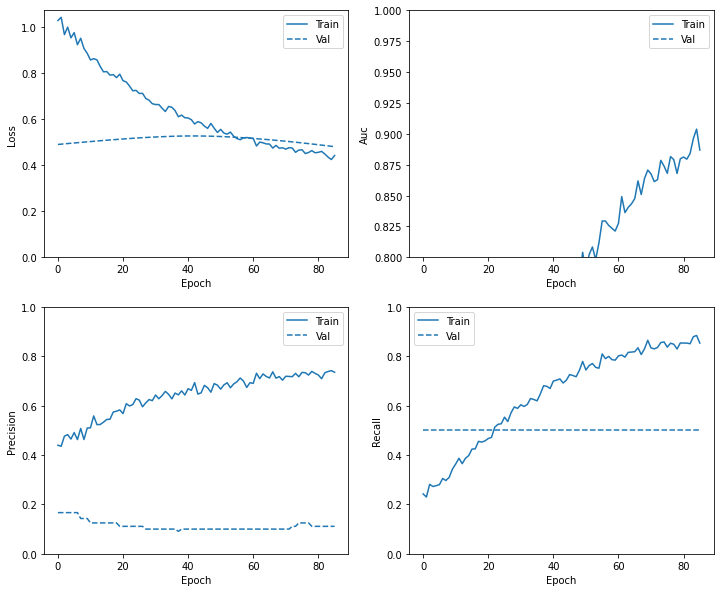

In [247]:
plot_metrics(resampled_history)

In [248]:
resampled_model = make_model()
resampled_model.load_weights(initial_weights)

# Reset the bias to zero, since this dataset is balanced.
output_layer = resampled_model.layers[-1] 
output_layer.bias.assign([0])

resampled_history = resampled_model.fit(
    resampled_ds,
    # These are not real epochs
    steps_per_epoch=20,
    epochs=10*EPOCHS,
    callbacks=[early_stopping],
    validation_data=(val_ds))

Epoch 1/1000
20/20 [==============================] - 3s 73ms/step - loss: 0.9506 - tp: 3520.4762 - fp: 3642.7143 - tn: 7694.8095 - fn: 7636.4762 - accuracy: 0.4925 - precision: 0.4743 - recall: 0.2957 - auc: 0.4502 - val_loss: 0.5114 - val_tp: 1.0000 - val_fp: 8.0000 - val_tn: 54.0000 - val_fn: 1.0000 - val_accuracy: 0.8594 - val_precision: 0.1111 - val_recall: 0.5000 - val_auc: 0.5121
Epoch 2/1000
20/20 [==============================] - 0s 23ms/step - loss: 0.7077 - tp: 6251.7619 - fp: 3806.3810 - tn: 7458.3810 - fn: 4913.9524 - accuracy: 0.6036 - precision: 0.6143 - recall: 0.5422 - auc: 0.6378 - val_loss: 0.5246 - val_tp: 1.0000 - val_fp: 9.0000 - val_tn: 53.0000 - val_fn: 1.0000 - val_accuracy: 0.8438 - val_precision: 0.1000 - val_recall: 0.5000 - val_auc: 0.5444
Epoch 3/1000
20/20 [==============================] - 0s 23ms/step - loss: 0.5637 - tp: 8296.3810 - fp: 3896.0952 - tn: 7273.4286 - fn: 2964.5714 - accuracy: 0.6898 - precision: 0.6788 - recall: 0.7287 - auc: 0.7760 - va

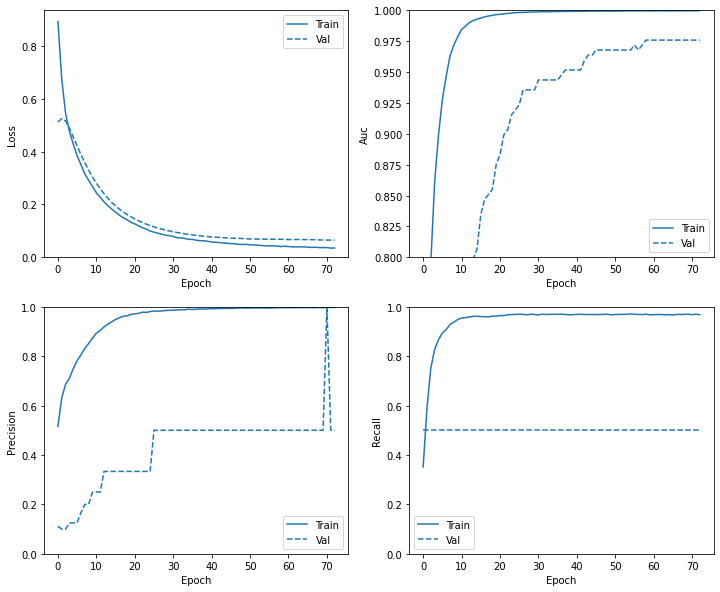

In [249]:
plot_metrics(resampled_history)

In [250]:
train_predictions_resampled = resampled_model.predict(train_features, batch_size=BATCH_SIZE)
test_predictions_resampled = resampled_model.predict(test_features, batch_size=BATCH_SIZE)

loss :  0.06567620486021042
tp :  3.0
fp :  0.0
tn :  76.0
fn :  1.0
accuracy :  0.987500011920929
precision :  1.0
recall :  0.75
auc :  0.9605262875556946

Legitimate Transactions Detected (True Negatives):  76
Legitimate Transactions Incorrectly Detected (False Positives):  0
Fraudulent Transactions Missed (False Negatives):  1
Fraudulent Transactions Detected (True Positives):  3
Total Fraudulent Transactions:  4


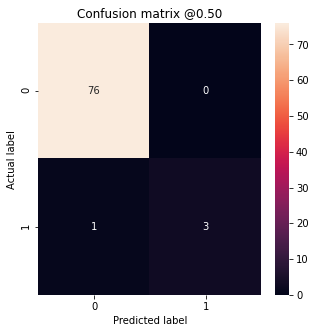

In [251]:
resampled_results = resampled_model.evaluate(test_features, test_labels,
                                             batch_size=BATCH_SIZE, verbose=0)
for name, value in zip(resampled_model.metrics_names, resampled_results):
  print(name, ': ', value)
print()

plot_cm(test_labels, test_predictions_resampled)

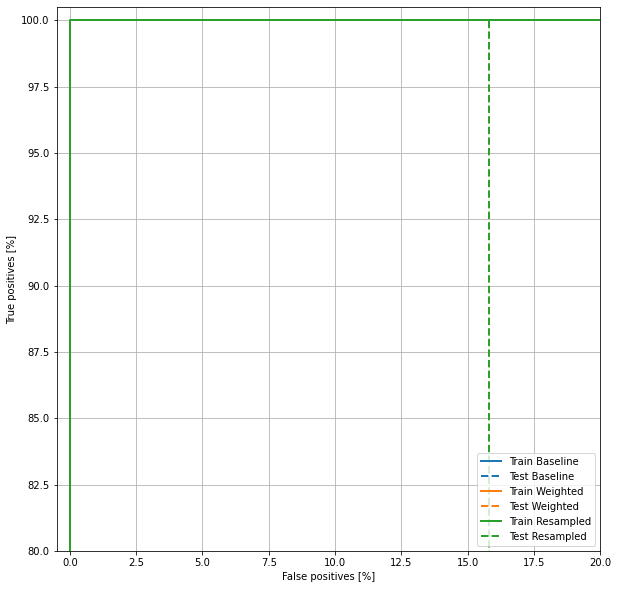

In [252]:
plot_roc("Train Baseline", train_labels, train_predictions_baseline, color=colors[0])
plot_roc("Test Baseline", test_labels, test_predictions_baseline, color=colors[0], linestyle='--')

plot_roc("Train Weighted", train_labels, train_predictions_weighted, color=colors[1])
plot_roc("Test Weighted", test_labels, test_predictions_weighted, color=colors[1], linestyle='--')

plot_roc("Train Resampled", train_labels, train_predictions_resampled, color=colors[2])
plot_roc("Test Resampled", test_labels, test_predictions_resampled, color=colors[2], linestyle='--')
plt.legend(loc='lower right')